In [1]:
!pip -q install langchain openai

In [2]:
import os
import pandas as pd

In [3]:
os.environ["OPENAI_API_KEY"] = "Your OpenAI Token"

Dataset Source - 
https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2019.csv

In [4]:
df = pd.read_csv('../input/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df.shape

(156, 9)

In [6]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

## Activate Langchain Agent

In [7]:
from langchain.agents import create_csv_agent
from langchain.llms import OpenAI

In [8]:
agent = create_csv_agent(OpenAI(temperature=0), 
                         '../input/2019.csv', 
                         verbose=True)

## Launch the Agent

In [9]:
agent

AgentExecutor(memory=None, callback_manager=<langchain.callbacks.shared.SharedCallbackManager object at 0x00000291B04EFC40>, verbose=True, agent=ZeroShotAgent(llm_chain=LLMChain(memory=None, callback_manager=<langchain.callbacks.shared.SharedCallbackManager object at 0x00000291B04EFC40>, verbose=False, prompt=PromptTemplate(input_variables=['agent_scratchpad', 'input'], output_parser=None, partial_variables={'df': '   Overall rank Country or region  Score  GDP per capita  Social support   \n0             1           Finland  7.769           1.340           1.587  \\\n1             2           Denmark  7.600           1.383           1.573   \n2             3            Norway  7.554           1.488           1.582   \n3             4           Iceland  7.494           1.380           1.624   \n4             5       Netherlands  7.488           1.396           1.522   \n\n   Healthy life expectancy  Freedom to make life choices  Generosity   \n0                    0.986                 

In [10]:
agent.agent.llm_chain.prompt.template

'\nYou are working with a pandas dataframe in Python. The name of the dataframe is `df`.\nYou should use the tools below to answer the question posed of you:\n\npython_repl_ast: A Python shell. Use this to execute python commands. Input should be a valid python command. When using this tool, sometimes output is abbreviated - make sure it does not look abbreviated before using it in your answer.\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [python_repl_ast]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\n\nThis is the result of `print(df.head())`:\n{df}\n\nBegin!\nQuestion: {input}\n{agent_scratchpad}'

## Ask Questions to the Agent

( Green Text represents the thoughts of the Agent)

In [11]:
agent.run("how many rows and columns are there in the dataframe?")



> Entering new AgentExecutor chain...
Thought: I need to find the shape of the dataframe
Action: python_repl_ast
Action Input: df.shape
Observation: (156, 9)
Thought: I now know the final answer
Final Answer: The dataframe has 156 rows and 9 columns.

> Finished chain.


'The dataframe has 156 rows and 9 columns.'

In [12]:
agent.run("What do you know about the dataset going by the column names?")



> Entering new AgentExecutor chain...
Thought: I should look at the column names to get an idea of what the dataset is about.
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Thought: I can see that the dataset contains information about countries or regions, such as their overall rank, score, GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.
Final Answer: The dataset contains information about countries or regions, such as their overall rank, score, GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

> Finished chain.


'The dataset contains information about countries or regions, such as their overall rank, score, GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.'

In [13]:
agent.run("Can you give me the correlation matrix among 'Score', 'GDP per capita', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'")



> Entering new AgentExecutor chain...
Thought: I need to calculate the correlation matrix
Action: python_repl_ast
Action Input: df[['Score', 'GDP per capita', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr()
Observation:                                  Score  GDP per capita   
Score                         1.000000        0.793883  \
GDP per capita                0.793883        1.000000   
Freedom to make life choices  0.566742        0.379079   
Generosity                    0.075824       -0.079662   
Perceptions of corruption     0.385613        0.298920   

                              Freedom to make life choices  Generosity   
Score                                             0.566742    0.075824  \
GDP per capita                                    0.379079   -0.079662   
Freedom to make life choices                      1.000000    0.269742   
Generosity                                        0.269742    1.000000   
Perceptions of corruptio

"The correlation matrix among 'Score', 'GDP per capita', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption' is:\n\nScore                         1.000000\nGDP per capita                0.793883\nFreedom to make life choices  0.566742\nGenerosity                    0.075824\nPerceptions of corruption     0.385613"

In [14]:
agent.run("What conclusion can you make seeing the result of the above correlation matrix")



> Entering new AgentExecutor chain...
Thought: I need to look at the data to make a conclusion
Action: python_repl_ast
Action Input: df.corr()
Observation: could not convert string to float: 'Finland'
Thought: I need to remove the first column
Action: python_repl_ast
Action Input: df.drop(columns=['Overall rank', 'Country or region']).corr()
Observation:                                  Score  GDP per capita  Social support   
Score                         1.000000        0.793883        0.777058  \
GDP per capita                0.793883        1.000000        0.754906   
Social support                0.777058        0.754906        1.000000   
Healthy life expectancy       0.779883        0.835462        0.719009   
Freedom to make life choices  0.566742        0.379079        0.447333   
Generosity                    0.075824       -0.079662       -0.048126   
Perceptions of corruption     0.385613        0.298920        0.181899   

                              Healthy life expec

'The correlation matrix shows that there is a strong positive correlation between GDP per capita, Social Support, and Healthy Life Expectancy, and a moderate positive correlation between Freedom to Make Life Choices and Generosity. There is also a moderate positive correlation between Perceptions of Corruption and Generosity.'

In [17]:
agent.run("Are There Missing Data in the dataframe?")



> Entering new AgentExecutor chain...
Thought: I should check for missing values
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
Thought: There are no missing values in the dataframe
Final Answer: No, there are no missing values in the dataframe.

> Finished chain.


'No, there are no missing values in the dataframe.'

In [18]:
agent.run("What are the unique regions in the dataframe?")



> Entering new AgentExecutor chain...
Thought: I need to find the unique values in the 'Country or region' column
Action: python_repl_ast
Action Input: df['Country or region'].unique()
Observation: ['Finland' 'Denmark' 'Norway' 'Iceland' 'Netherlands' 'Switzerland'
 'Sweden' 'New Zealand' 'Canada' 'Austria' 'Australia' 'Costa Rica'
 'Israel' 'Luxembourg' 'United Kingdom' 'Ireland' 'Germany' 'Belgium'
 'United States' 'Czech Republic' 'United Arab Emirates' 'Malta' 'Mexico'
 'France' 'Taiwan' 'Chile' 'Guatemala' 'Saudi Arabia' 'Qatar' 'Spain'
 'Panama' 'Brazil' 'Uruguay' 'Singapore' 'El Salvador' 'Italy' 'Bahrain'
 'Slovakia' 'Trinidad & Tobago' 'Poland' 'Uzbekistan' 'Lithuania'
 'Colombia' 'Slovenia' 'Nicaragua' 'Kosovo' 'Argentina' 'Romania' 'Cyprus'
 'Ecuador' 'Kuwait' 'Thailand' 'Latvia' 'South Korea' 'Estonia' 'Jamaica'
 'Mauritius' 'Japan' 'Honduras' 'Kazakhstan' 'Bolivia' 'Hungary'
 'Paraguay' 'Northern Cyprus' 'Peru' 'Portugal' 'Pakistan' 'Russia'
 'Philippines' 'Serbia' 'Mold

'The unique regions in the dataframe are Finland, Denmark, Norway, Iceland, Netherlands, Switzerland, Sweden, New Zealand, Canada, Austria, Australia, Costa Rica, Israel, Luxembourg, United Kingdom, Ireland, Germany, Belgium, United States, Czech Republic, United Arab Emirates, Malta, Mexico, France, Taiwan, Chile, Guatemala, Saudi Arabia, Qatar, Spain, Panama, Brazil, Uruguay, Singapore, El Salvador, Italy, Bahrain, Slovakia, Trinidad & Tobago, Poland, Uzbekistan, Lithuania, Colombia, Slovenia, Nicaragua, Kosovo, Argentina, Romania, Cyprus, Ecuador, Kuwait, Thailand, Latvia, South Korea, Estonia, Jamaica, Mauritius, Japan, Honduras, Kazakhstan, Bolivia, Hungary, Paraguay, Northern Cyprus, Peru, Portugal, Pakistan, Russia, Philippines, Serbia, Moldova, Libya, Montenegro, Tajikistan, Croatia, Hong Kong, Dominican Republic, Bosnia and Herzegovina, Turkey, Malaysia, Belarus, Greece, Mongolia, North Macedonia, Nigeria, Kyrgyzstan, Turkmenistan, Algeria, Morocco, Azerbaijan, Lebanon, Indone



> Entering new AgentExecutor chain...
Thought: I need to sort the dataframe by score and then plot the top 10
Action: python_repl_ast
Action Input: df.sort_values(by='Score', ascending=False).head(10).plot.bar(x='Country or region', y='Score')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A barplot showing the top 10 regions by their score, with the regions along the x-axis and their score along the y axis.

> Finished chain.


'A barplot showing the top 10 regions by their score, with the regions along the x-axis and their score along the y axis.'

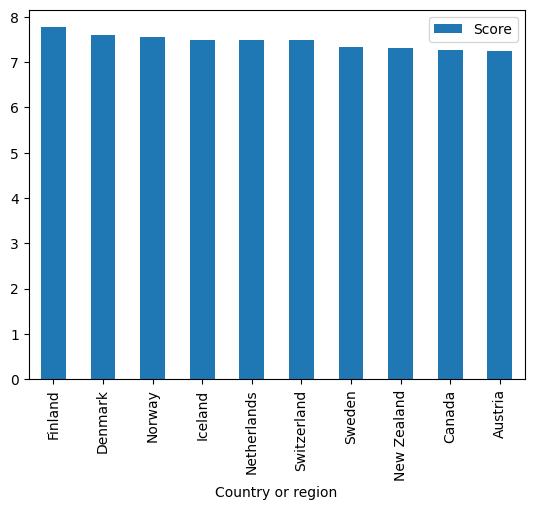

In [19]:
agent.run("Plot a barplot showing top 10 regions by their 'score'. Show the regions along the x-axis and their score along the y axis")



> Entering new AgentExecutor chain...
Thought: I need to get the data for the top 10 regions by their happiness score
Action: python_repl_ast
Action Input: df.sort_values(by='Score', ascending=False).head(10)
Observation:    Overall rank Country or region  Score  GDP per capita  Social support   
0             1           Finland  7.769           1.340           1.587  \
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   
5             6       Switzerland  7.480           1.452           1.526   
6             7            Sweden  7.343           1.387           1.487   
7             8       New Zealand  7.307           1.303           1.557   
8             9            Canada  7.278           1.365           1.505   
9            10 

'A horizontal bar plot showing the ratio of the factors affecting the Happiness Score according to the regions, including only the top 10 regions by their happiness score.'

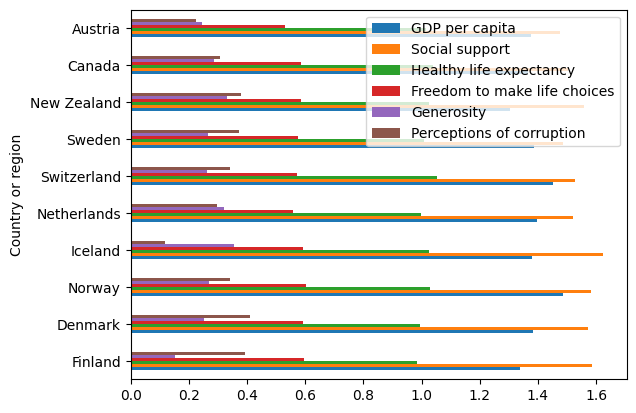

In [22]:
agent.run("Horizontal bar plot showing What is the ratio of the factors affecting the Happiness Score according to the regions, include only top 10 regions by their happyness score")